In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [19]:
tf.__version__
keras.__version__

'2.10.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()
X_train_full.shape
X_train_full.dtype
X_valid,X_train = X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test/255.

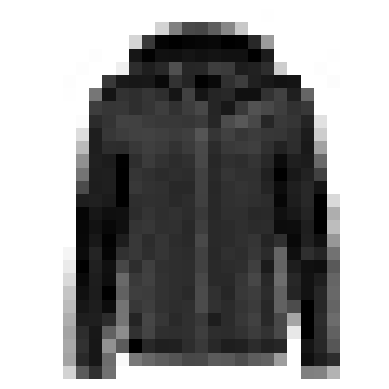

In [9]:
plt.imshow(X_train[0],cmap="binary")
plt.axis('off')
plt.show()

In [14]:

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train,y_train,epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 24s 13ms/step - loss: 0.7166 - accuracy: 0.7636 - val_loss: 0.5247 - val_accuracy: 0.8208
Epoch 2/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4887 - accuracy: 0.8298 - val_loss: 0.4371 - val_accuracy: 0.8482
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4410 - accuracy: 0.8446 - val_loss: 0.5449 - val_accuracy: 0.7972
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4142 - accuracy: 0.8553 - val_loss: 0.3962 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3955 - accuracy: 0.8609 - val_loss: 0.3774 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3770 - accuracy: 0.8667 - val_loss: 0.3732 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3652 - accuracy: 0.8703 - val_loss: 0.3664 - val_a

NameError: name 'save_fig' is not defined

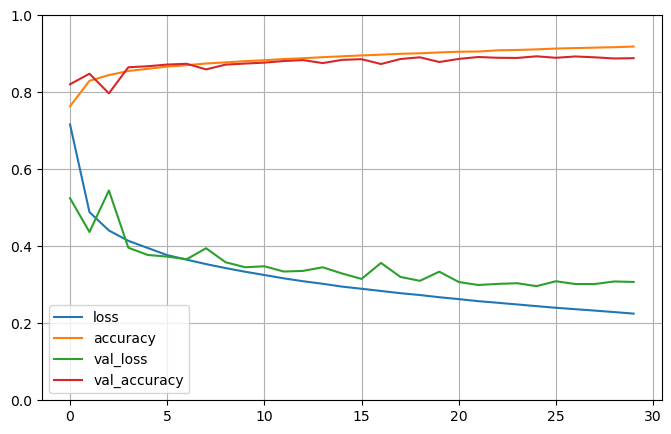

In [25]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
save_fig("keras_learning_curves_plot")
plt.show()